# Introductory examples

## 1.usa.gov data from bit.ly

In [3]:
%pwd

'C:\\Users\\ASUS\\Documents\\python-Analysis-master'

In [6]:
path = 'c/ch02/1.txt'

读取文件的第一行

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

json 结构 解析全文并读取第一行数据

In [7]:
import json
records = [json.loads(line) for line in open(path)]

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

获取第一行tz（时区）的属性

In [5]:
records[0]['tz']

'America/New_York'

In [6]:
print(records[0]['tz'])

America/New_York


### 对时区进行计数

In [10]:
zones={}
for line in records:
    if line['tz'] is None:
        continue
    else 

SyntaxError: invalid syntax (<ipython-input-10-a13f302a07b1>, line 5)

In [ ]:
zones={}
for line in records

先获取所有的时区

In [12]:
seri={}
for each in records:
    if 'tz' in each:
        if each['tz'] in seri:
            seri[each['tz']]+=1
        else:
            seri[each['tz']]=1

In [15]:
seri['America/New_York']

1251

In [10]:
time_zones = [rec['tz'] for rec in records]
#并非所有行都有['tz']的属性

KeyError: 'tz'

In [12]:
#并非所有rec['tx']都有值
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [12]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

对时区进行计数 

In [14]:
# 字典效用高于列表，
results=[]
for time in time_zones:
    if time not in results:
        results.append[time]
        print(results)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [11]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [ ]:
#使用Python标准库
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [17]:
counts = get_counts(time_zones)


In [17]:
counts['America/New_York']

1251

In [ ]:
len(time_zones)

### 获取前十名的时区

字典.items() 直接排序

In [22]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()# 对（count,tz) 第一个参数进行排序
    return value_key_pairs[-n:] 

In [23]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [ ]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

### 用pandas进行前十名筛选  DataFrame['列'].value_counts 并缺失值和未知值填充 并柱状图

In [17]:
%matplotlib inline

In [14]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
from pandas import DataFrame, Series
import pandas as pd

In [21]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [29]:
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [30]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [31]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

未知时区填充unknown ,缺失填充Missing，在排序

In [32]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

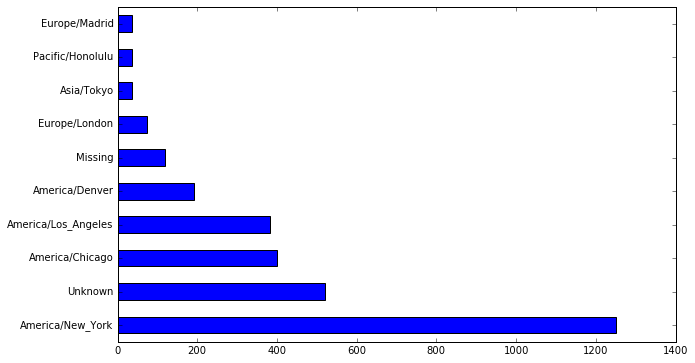

In [39]:
tz_counts[:10].plot(kind='barh', rot=0) # rot=0 参数有否内容无差

In [42]:
frame['a'].head()

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

### 解析a字段内的内容 （提取a字段并获得第一个字符串）

In [23]:
frame['a'][0].split()[0]
#考虑a为空 

'Mozilla/5.0'

In [43]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [44]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [25]:
cframe = frame[frame.a.notnull()]

#### 按是否是windows用户的时区进行分解,并按时区大小排序

In [24]:
lamdba x: if 'windows' in x,'windows','not windows'
#np.where()

SyntaxError: invalid syntax (<ipython-input-24-9f5877e97e15>, line 1)

In [27]:
type(cframe.a)

pandas.core.series.Series

In [28]:
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')

In [29]:
by_tz_os = cframe.groupby(['tz', operating_system])
by_tz_os.count().head()
# count()  size() 区别

_heartbeat_    a   al  c  cy    g  gr    h  \
tz                                                                          
                  Not Windows            0  245  239  0   0  245   0  245   
                  Windows                0  276  268  0   0  276   0  276   
Africa/Cairo      Windows                0    3    3  3   3    3   3    3   
Africa/Casablanca Windows                0    1    1  1   1    1   1    1   
Africa/Ceuta      Windows                0    2    2  2   2    2   2    2   

                                hc   hh  kw    l  ll   nk    r    t    u  
tz                                                                        
                  Not Windows  245  245   4  245   0  245  245  245  245  
                  Windows      276  276   7  276   0  276  276  276  276  
Africa/Cairo      Windows        3    3   0    3   3    3    3    3    3  
Africa/Casablanca Windows        1    1   0    1   1    1    1    1    1  
Africa/Ceuta      Windows        2    2   0    2   2    2    2    2    2

In [31]:
type(by_tz_os.size())

pandas.core.series.Series

In [32]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [66]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[-10:]
# sort 用于列表 a.sort()  sorted 用于 列表和循环 sorted(a) argsort() 用于一维或二维数组

tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [65]:
#np.take 通过索引获得数组内容
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


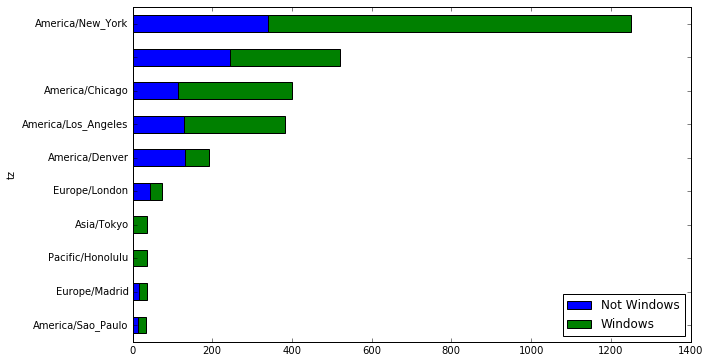

In [67]:
count_subset.plot(kind='barh', stacked=True)

归一化作图

In [69]:
count_subset.sum(1)

tz
America/Sao_Paulo        33.0
Europe/Madrid            35.0
Pacific/Honolulu         36.0
Asia/Tokyo               37.0
Europe/London            74.0
America/Denver          191.0
America/Los_Angeles     382.0
America/Chicago         400.0
                        521.0
America/New_York       1251.0
dtype: float64

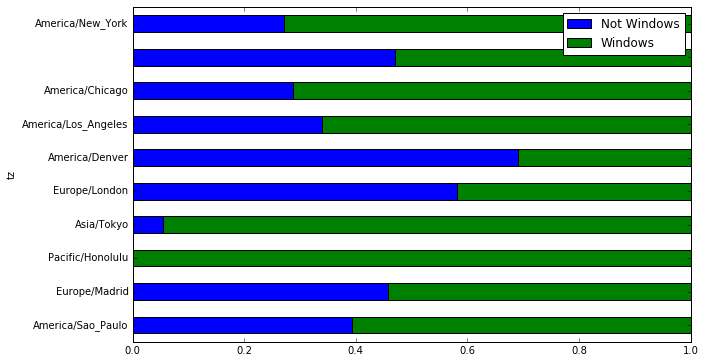

In [68]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## 示例： MovieLens 1M data set

In [36]:
import pandas as pd
import os
encoding = 'latin1'

#upath = os.path.expanduser('ch02/movielens/users.dat')
#rpath = os.path.expanduser('ch02/movielens/ratings.dat')
#mpath = os.path.expanduser('ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_table(r'c/ch02/movielens/users.dat', sep='::', header=None, names=unames, encoding=encoding,engine = 'python')
ratings = pd.read_table(r'c/ch02/movielens/ratings.dat', sep='::', header=None, names=rnames, encoding=encoding,engine = 'python')
movies = pd.read_table(r'c/ch02/movielens/movies.dat', sep='::', header=None, names=mnames, encoding=encoding,engine = 'python')

In [4]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


#### 根据性别和年龄计算某个电影的评分

第一步 合并三个表格 第二部 透视表

In [37]:
data = pd.merge(pd.merge(ratings, users), movies)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [52]:
a=data.groupby(['title','gender']).mean()['rating']
a=DataFrame(a)
a.unstack().head()

rating          
gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

In [16]:
data[:2]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama


In [46]:
data.age[0]

1

In [17]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [63]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


过滤评分数据不足250条的数据

In [56]:
ratings_by_title = data.groupby('title').size()

In [20]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [58]:
ratings_by_title[ratings_by_title >= 250]

title
'burbs, The (1989)                                                     303
10 Things I Hate About You (1999)                                      700
101 Dalmatians (1961)                                                  565
101 Dalmatians (1996)                                                  364
12 Angry Men (1957)                                                    616
13th Warrior, The (1999)                                               750
2 Days in the Valley (1996)                                            286
20,000 Leagues Under the Sea (1954)                                    575
2001: A Space Odyssey (1968)                                          1716
2010 (1984)                                                            470
28 Days (2000)                                                         505
39 Steps, The (1935)                                                   253
54 (1998)                                                              259
7th Voyage of Sinba

In [61]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [22]:
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

In [64]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1216 entries, 'burbs, The (1989) to eXistenZ (1999)
Data columns (total 2 columns):
F    1216 non-null float64
M    1216 non-null float64
dtypes: float64(2)
memory usage: 28.5+ KB


In [ ]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

女性最喜欢的前十名

In [28]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### 计算评分分歧 找出男生和女生分歧最大电影

In [65]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
#绝对值函数abs

In [66]:
sorted_by_diff = mean_ratings.sort_values(by='diff',ascending=False)
sorted_by_diff[:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [69]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


只找出分歧最大的电影 求方差

In [37]:
# 根据电影名称分组得分数据标准差
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title[:5]
#data 原始合并数据 

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [38]:
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.ix[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### US Baby Names 1880-2010

In [19]:
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

'C:\\Users\\Administrator\\Documents'

http://www.ssa.gov/oact/babynames/limits.html

In [8]:
!head -n 10 c/ch02/names/yob1880.txt

'head' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [70]:
import pandas as pd
#因为是标准逗号分隔，pd.read_csv 
names1880 = pd.read_csv('c/ch02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [4]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


用births列的sex分组小计表示该年度的births总计

In [27]:
names1880.groupby('sex').sum()

,births
sex,
F,90993
M,110493


In [77]:
b=names1880.groupby('sex').sum()
b.ix[0]

births    90993
Name: F, dtype: int64

In [75]:
a=names1880.groupby('sex').births.sum()
a[0]

90993

#### 数据按照年份被分隔多个文件，把他们合并一起 合并1880-2010年数据，并添加yearl列

In [ ]:
for a in range[1880:2011]:
    pd.read_scv('%s')%a
先读数据形成列表在concat    

In [78]:
# 2010 是文本最后一个有效年度
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'c/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
# pieces 列表内含有1880-2010年数据 pieces[0]=1880年数据

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
# pd.concat 是按行把多个数组组合到一起，ignore_index=True ,不保留原有的行号

In [15]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [16]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [20]:
total_births.plot()

In [81]:
names.births.sum()

322402727

#### 插入一列births的婴儿数相对于总出生的比例 按year和sex分组

In [82]:
def add_prop(group):
    # 比例除法，需要调整类型
    births = group.births.astype(float) # astype 类型转换 

    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [22]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 5 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
prop      1690784 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 64.5+ MB


In [24]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


验证比例之和是否为1 浮点数用np.allclose

In [ ]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

#### 每对sex/year组合前1000个名字

In [85]:
#第一种
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [ ]:
#第二种
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [28]:
top1000.index = np.arange(len(top1000))

In [29]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261877 entries, 0 to 261876
Data columns (total 5 columns):
name      261877 non-null object
sex       261877 non-null object
births    261877 non-null int64
year      261877 non-null int64
prop      261877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 12.0+ MB


### 分析命名趋势

首先分开男生和女生两个数组

In [86]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [35]:
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [ ]:
total_births = top1000.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
total_births

绘制'John', 'Harry', 'Mary', 'Marilyn' 的曲线图

In [38]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A25D358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015C53208>], dtype=object)

#### 评估命名多样性增长

计算最流行的1000个名字的所占比例

In [39]:
plt.figure()

In [40]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

计算占总出生人数前50%的不同名字的数量，暂时只考虑2010男

In [89]:
df = boys[boys.year == 2010]
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1000 entries, (2010, M, 1676644) to (2010, M, 1677645)
Data columns (total 5 columns):
name      1000 non-null object
sex       1000 non-null object
births    1000 non-null int64
year      1000 non-null int64
prop      1000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [90]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

找出50%应该被插入在哪个位置才能保证不破坏顺序

In [91]:
prop_cumsum.values.searchsorted(0.5)

116

In [46]:
#1990年50%在哪个位置
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [47]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [48]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


In [ ]:
diversity.plot(title="Number of popular names in top 50%")

#### 最后一个字母变革

In [49]:
# 提取最后一个字母
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [50]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [51]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [52]:
letter_prop = subtable / subtable.sum().astype(float)

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [54]:
plt.subplots_adjust(hspace=0.25)

In [55]:
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [ ]:
plt.close('all')

In [ ]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [ ]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

In [ ]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

In [ ]:
plt.close('all')

In [ ]:
table.plot(style={'M': 'k-', 'F': 'k--'})